The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [64]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Start coding here!
nobel_df = pd.read_csv('data/nobel.csv')
print(nobel_df.head(10))
print(nobel_df.columns)
nobel_df.describe(include="all")

   year    category  ...      death_city   death_country
0  1901   Chemistry  ...          Berlin         Germany
1  1901  Literature  ...        Châtenay          France
2  1901    Medicine  ...         Marburg         Germany
3  1901       Peace  ...          Heiden     Switzerland
4  1901       Peace  ...           Paris          France
5  1901     Physics  ...          Munich         Germany
6  1902   Chemistry  ...          Berlin         Germany
7  1902  Literature  ...  Charlottenburg         Germany
8  1902    Medicine  ...    Putney Heath  United Kingdom
9  1902       Peace  ...            Bern     Switzerland

[10 rows x 18 columns]
Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


year  category  ... death_city             death_country
count   1000.000000      1000  ...        579                       585
unique          NaN         6  ...        293                        50
top             NaN  Medicine  ...      Paris  United States of America
freq            NaN       227  ...         27                       206
mean    1973.721000       NaN  ...        NaN                       NaN
std       34.523195       NaN  ...        NaN                       NaN
min     1901.000000       NaN  ...        NaN                       NaN
25%     1949.750000       NaN  ...        NaN                       NaN
50%     1979.000000       NaN  ...        NaN                       NaN
75%     2003.000000       NaN  ...        NaN                       NaN
max     2023.000000       NaN  ...        NaN                       NaN

[11 rows x 18 columns]

In [65]:
nobel_df

year    category  ... death_city death_country
0    1901   Chemistry  ...     Berlin       Germany
1    1901  Literature  ...   Châtenay        France
2    1901    Medicine  ...    Marburg       Germany
3    1901       Peace  ...     Heiden   Switzerland
4    1901       Peace  ...      Paris        France
..    ...         ...  ...        ...           ...
995  2023   Chemistry  ...        NaN           NaN
996  2023   Chemistry  ...        NaN           NaN
997  2023  Literature  ...        NaN           NaN
998  2023       Peace  ...        NaN           NaN
999  2023   Economics  ...        NaN           NaN

[1000 rows x 18 columns]

## What is the most commonly awarded gender and birth country?
_Store your answers as string variables_ top_gender _and_ top_country.

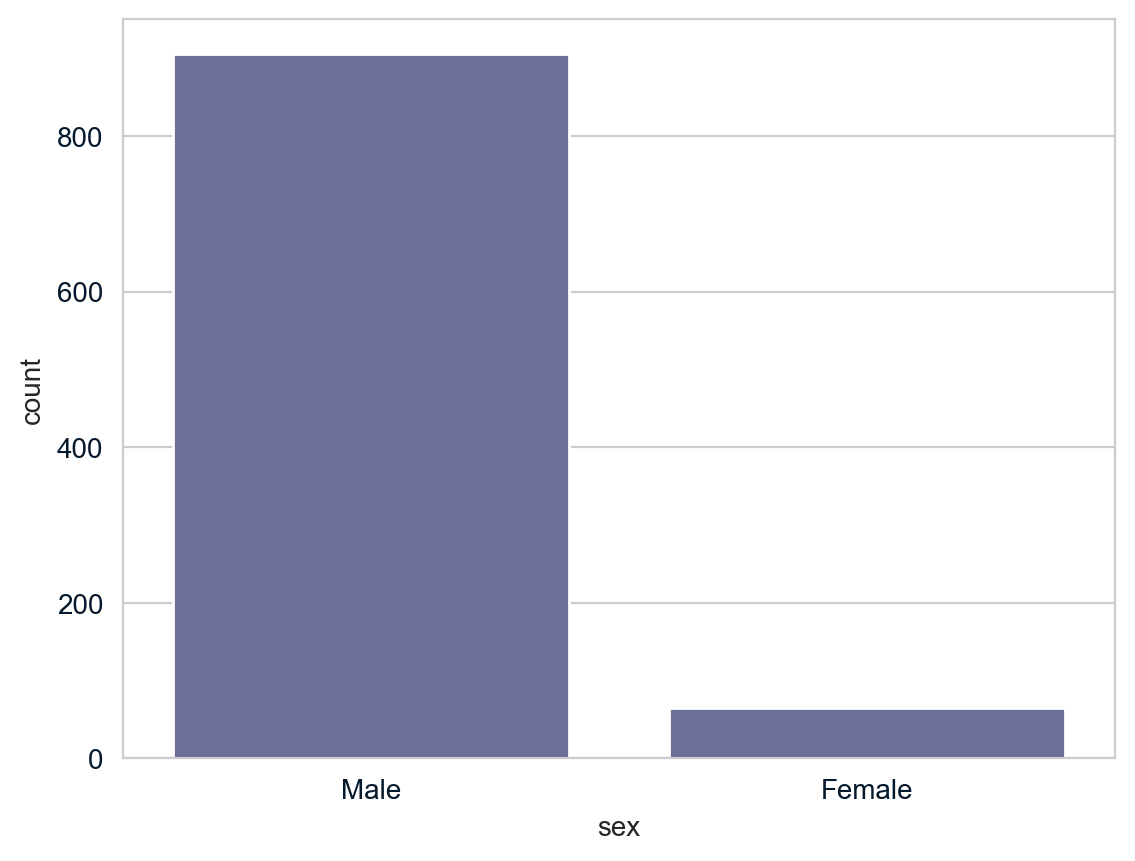

In [66]:
sns.countplot(x= nobel_df['sex'])
plt.show()

In [67]:
top_gender= nobel_df['sex'].value_counts().idxmax()

top_country= nobel_df['birth_country'].value_counts().idxmax()

top_country, top_gender

('United States of America', 'Male')

In [68]:
nobel = nobel_df

**Datacamp**

In [69]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


## Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

_Store this as an integer called_ max_decade_usa.

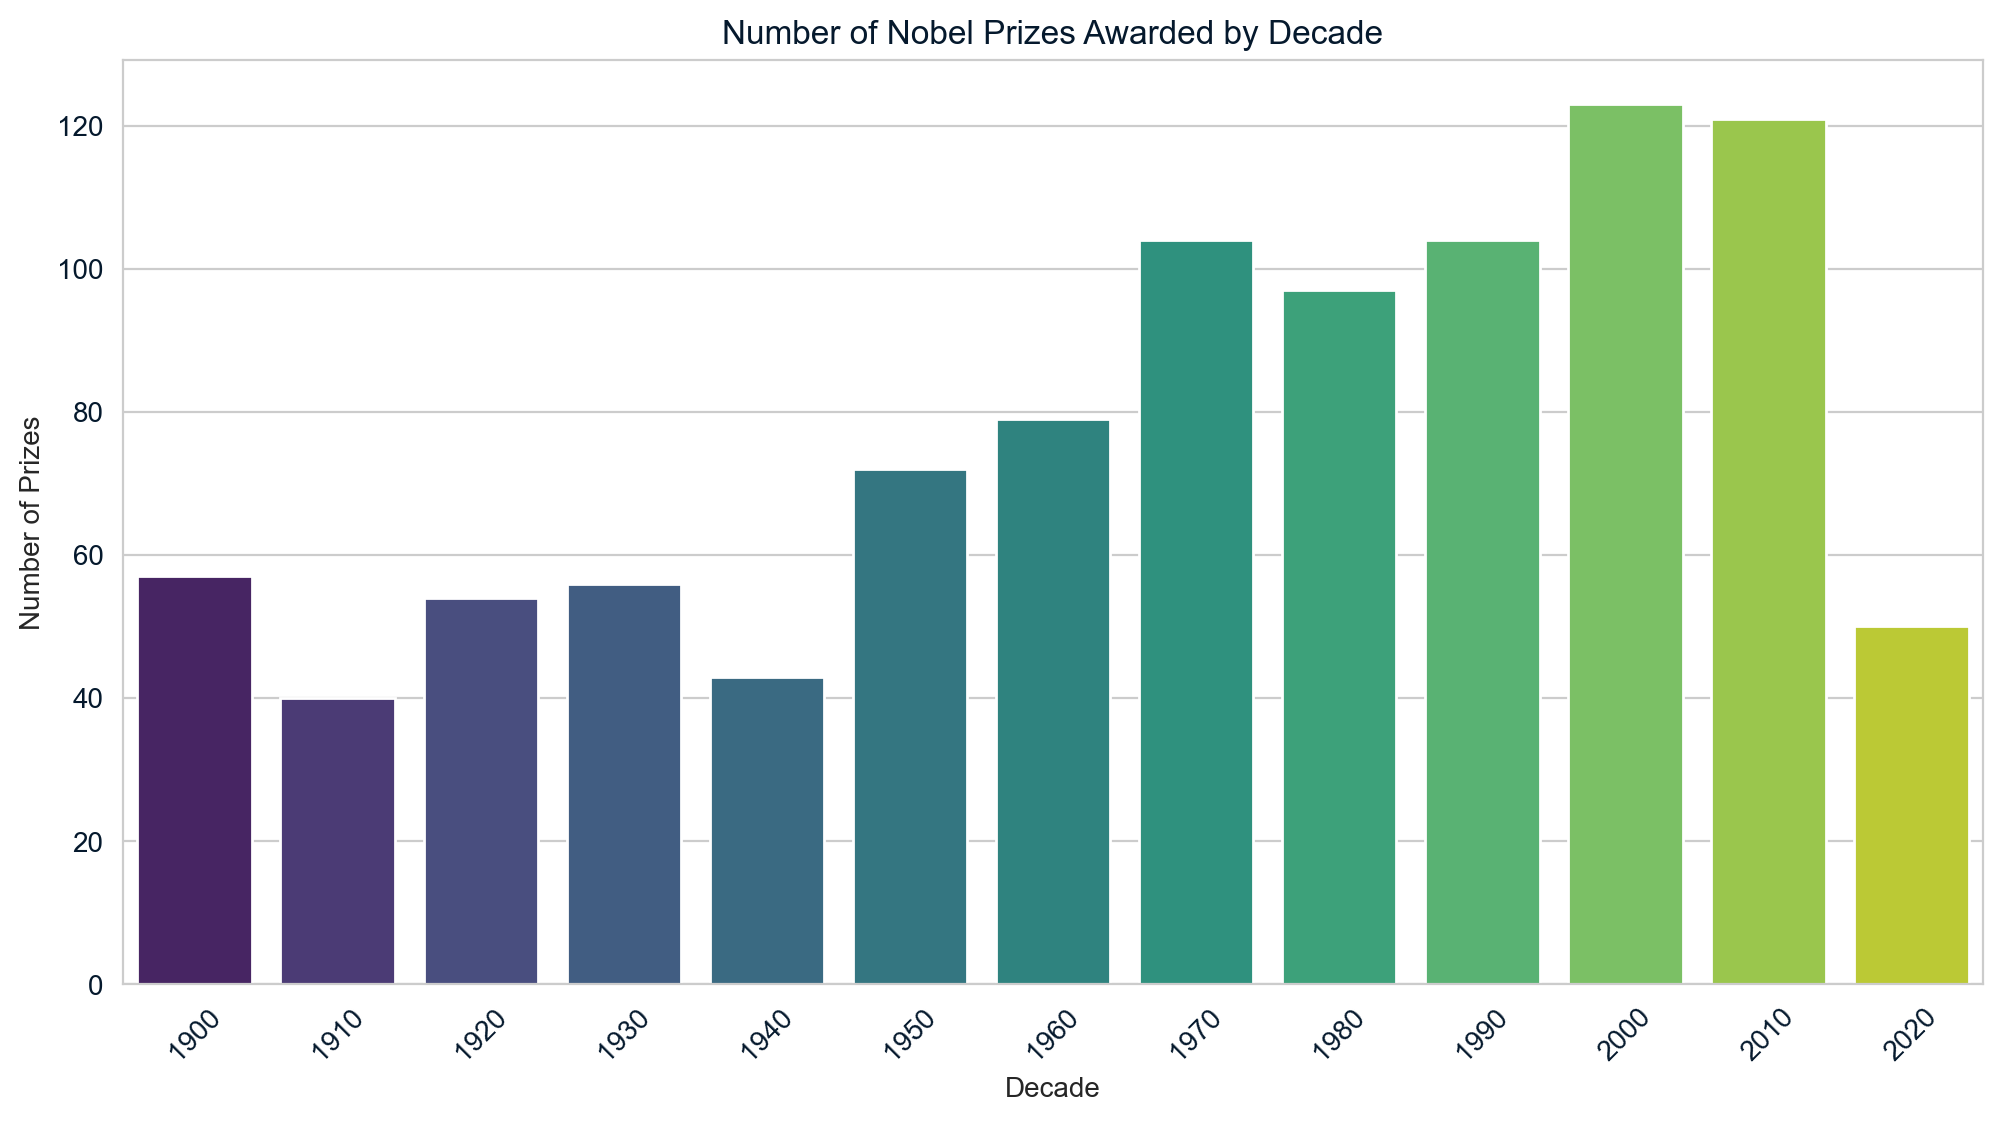

In [70]:
sns.set_style("whitegrid")

# Adding a new column for the decade
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Creating the seaborn bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=nobel_df, x='decade', palette='viridis')
plt.title('Number of Nobel Prizes Awarded by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Prizes')
plt.xticks(rotation=45)
plt.show()

In [71]:
nobel_df['birth_country'].unique()

array(['Netherlands', 'France', 'Prussia (Poland)', 'Switzerland',
       'Prussia (Germany)', 'Schleswig (Germany)', 'India', 'Sweden',
       'Norway', 'Faroe Islands (Denmark)', 'United Kingdom',
       'Russian Empire (Poland)', 'Scotland', 'Spain', 'Russia', nan,
       'Poland', 'Germany', 'Austrian Empire (Czech Republic)',
       'Hungary (Slovakia)', 'Tuscany (Italy)', 'Italy',
       'United States of America', 'Bavaria (Germany)',
       'British India (India)', 'Austrian Empire (Italy)', 'New Zealand',
       'East Friesland (Germany)', 'Russian Empire (Ukraine)', 'Denmark',
       'Luxembourg', 'Russian Empire (Latvia)', 'Belgium',
       'Hesse-Kassel (Germany)', 'Germany (Russia)',
       'Mecklenburg (Germany)', 'Austria', 'Prussia (Russia)',
       'Australia', 'Austria-Hungary (Slovenia)', 'Ireland', 'Canada',
       'Java, Dutch East Indies (Indonesia)', 'Austrian Empire (Austria)',
       'Germany (Poland)', 'W&uuml;rttemberg (Germany)', 'Argentina',
       'Austria

In [72]:
# Filter the dataframe for entries where birth_country is 'United States of America'
usa_born_df = nobel_df[nobel_df['birth_country']== 'United States of America']

# Group by decade and count the number of entries for each decade
usa_born_count_by_decade = usa_born_df.groupby('decade').size()

# Group by decade and count the total number of entries for each decade
total_count_by_decade = nobel_df.groupby('decade').size()

# Calculate the ratio of 'United States of America' born laureates to total laureates for each decade
ratio_by_decade = (usa_born_count_by_decade / total_count_by_decade).fillna(0)

max_decade_usa = ratio_by_decade.idxmax()

max_decade_usa

2000

**Datacamp**

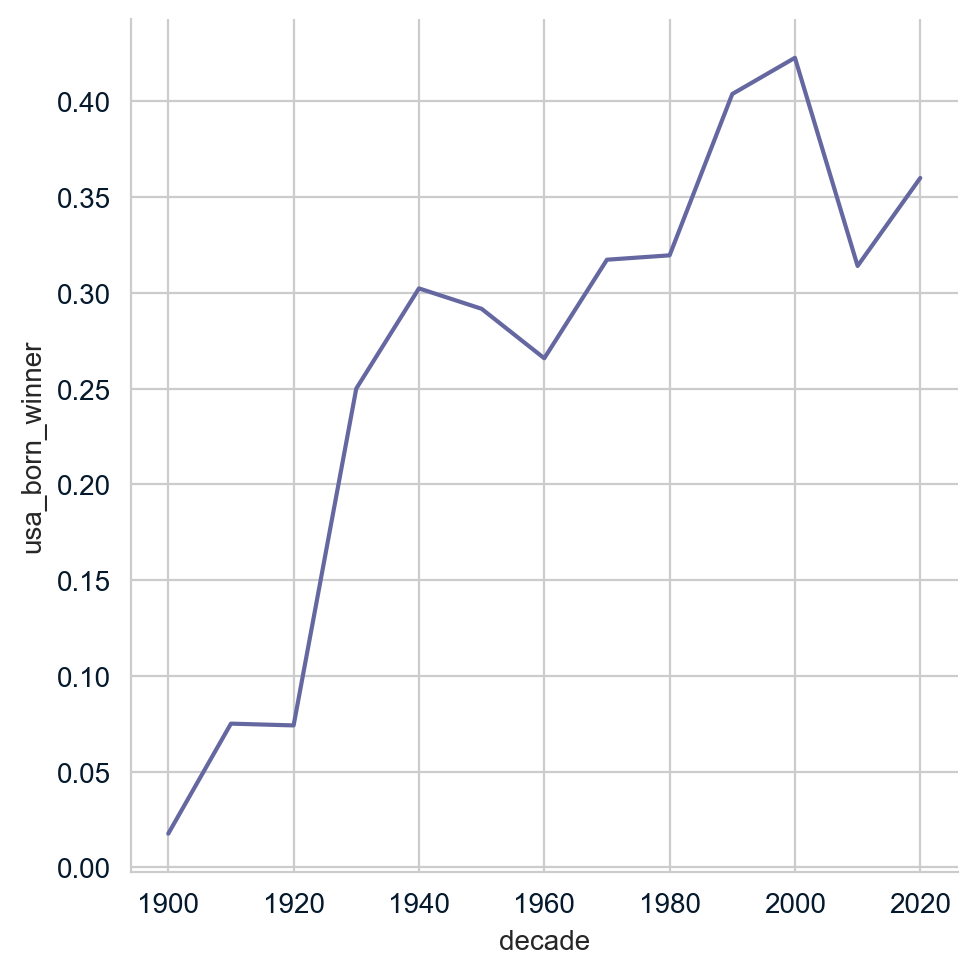

In [73]:
# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

## Which decade and Nobel Prize category combination had the highest proportion of female laureates?

_Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair._

In [74]:
female_df = nobel_df[nobel_df['sex']=='Female']

In [75]:
female_laureates = nobel_df[nobel_df['sex']=='Female'][['decade','category']].sort_values('category')

In [76]:
print(female_laureates['category'].value_counts())

Peace         19
Literature    17
Medicine      13
Chemistry      8
Physics        5
Economics      3
Name: category, dtype: int64


In [77]:
print(female_laureates['decade'].value_counts())

2010    13
2000    11
2020    11
1990     7
1980     4
1970     4
1960     3
1930     3
1900     3
1940     3
1920     2
1910     1
Name: decade, dtype: int64


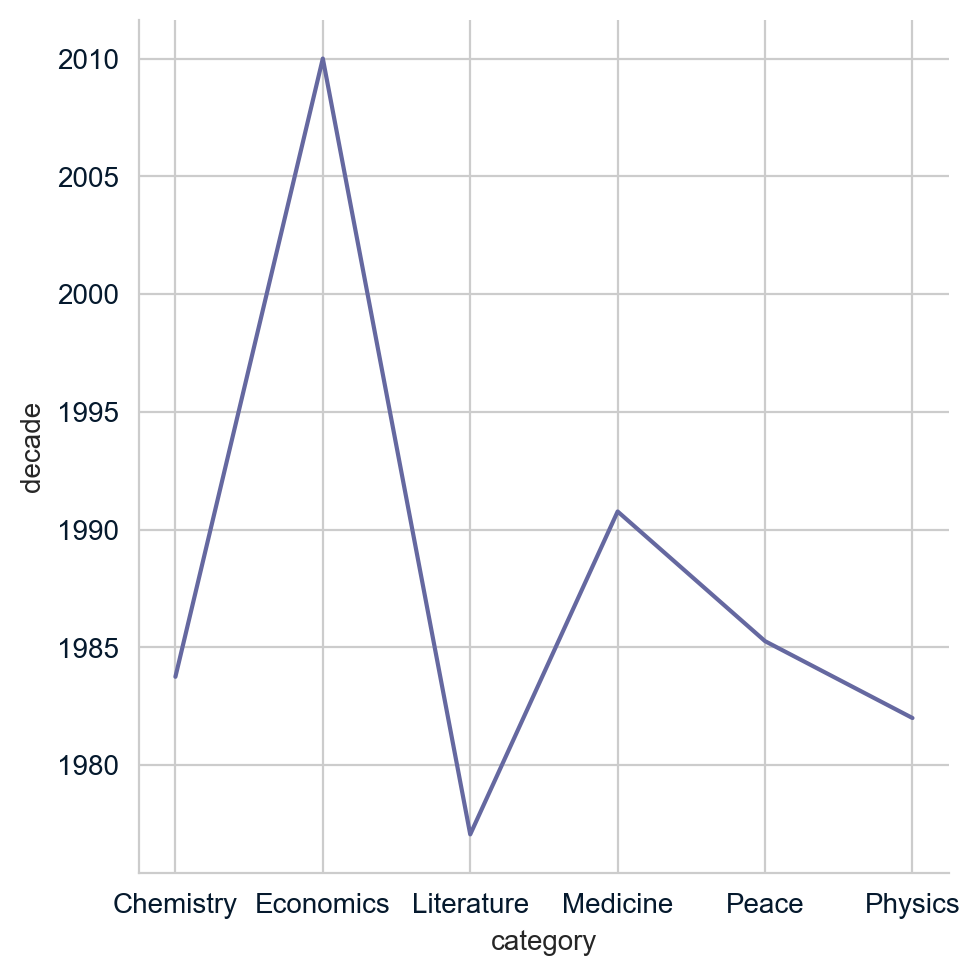

In [78]:
sns.relplot(kind='line', data= female_laureates, x= 'category', y='decade', ci = None)
plt.show()

<Figure size 1200x600 with 0 Axes>

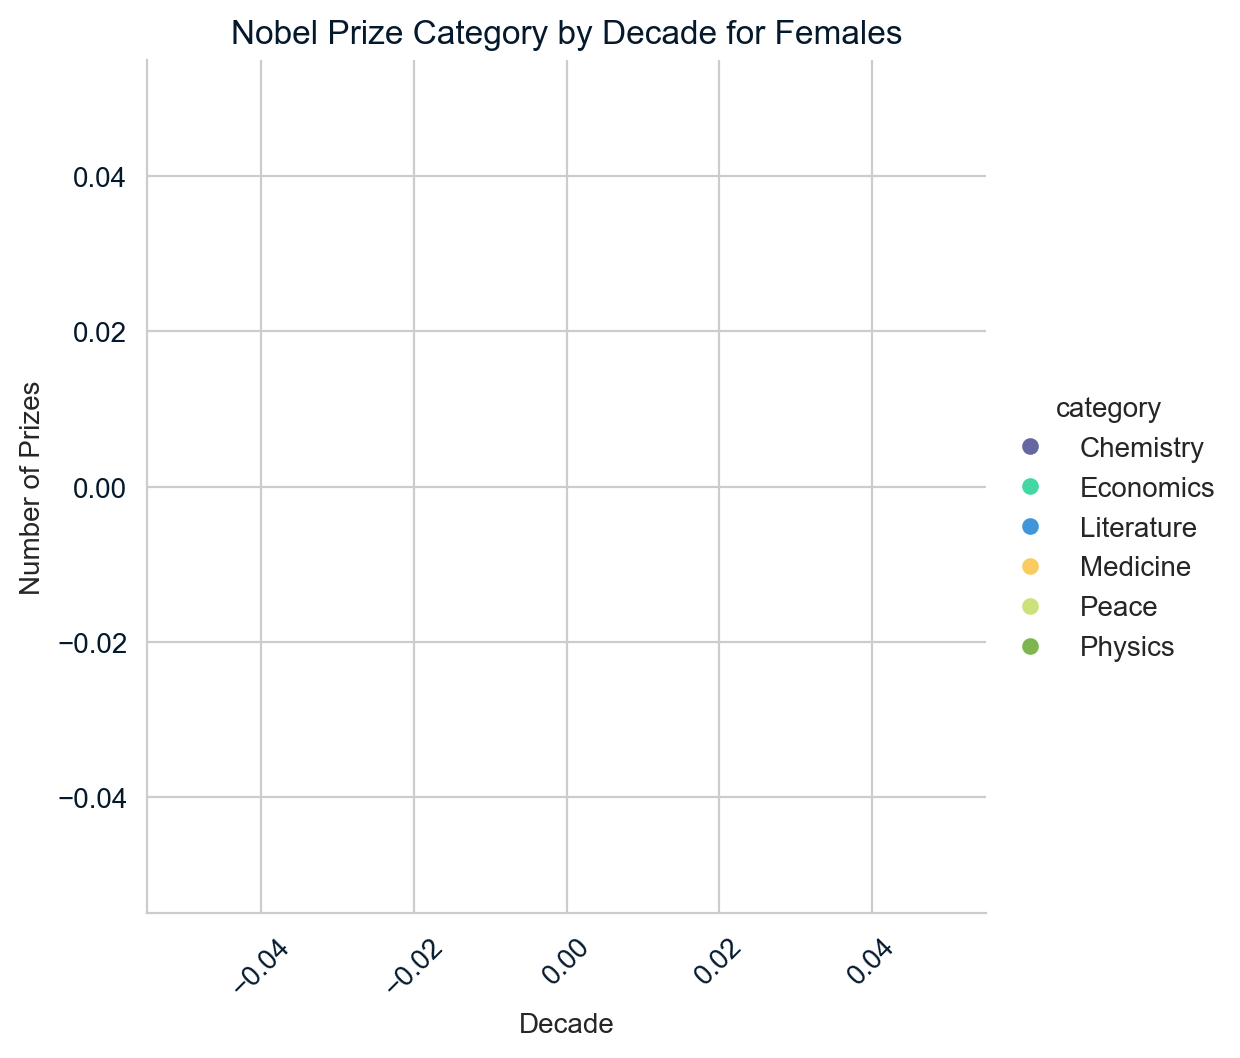

In [79]:
# Creating the seaborn bar chart
plt.figure(figsize=(12, 6))
sns.relplot(data= female_laureates, x='decade', hue= 'category')
plt.title('Nobel Prize Category by Decade for Females')
plt.xlabel('Decade')
plt.ylabel('Number of Prizes')
plt.xticks(rotation=45)
plt.show()

In [80]:
max_female_dict ={2010:'Peace'}

**Datacamp**

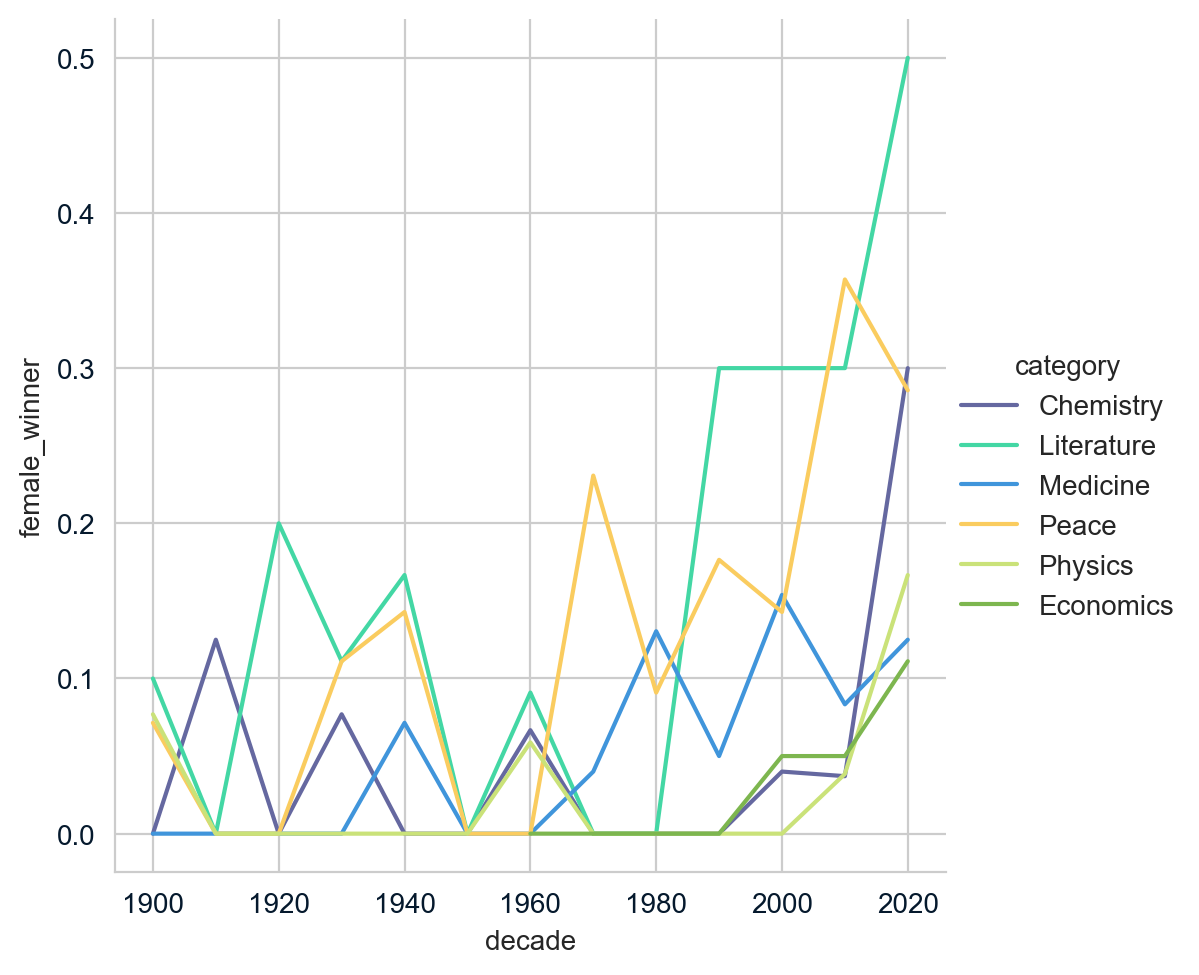

In [81]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")


## Who was the first woman to receive a Nobel Prize, and in what category?


_Save your string answers as_ first_woman_name _and_ first_woman_category

In [82]:
print(female_df.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'decade', 'usa_born_winner'],
      dtype='object')


In [83]:
female_df

year    category  ... decade usa_born_winner
19   1903     Physics  ...   1900           False
29   1905       Peace  ...   1900           False
51   1909  Literature  ...   1900           False
62   1911   Chemistry  ...   1910           False
128  1926  Literature  ...   1920           False
..    ...         ...  ...    ...             ...
982  2022  Literature  ...   2020           False
989  2023    Medicine  ...   2020           False
993  2023     Physics  ...   2020           False
998  2023       Peace  ...   2020           False
999  2023   Economics  ...   2020            True

[65 rows x 20 columns]

In [84]:
first_woman_name = female_df.loc[female_df['year'].idxmin(), 'full_name']
first_woman_category = female_df.loc[female_df['year'].idxmin(), 'category']


first_woman_name, first_woman_category

('Marie Curie, née Sklodowska', 'Physics')

**Datacamp**

In [85]:
# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


## Which individuals or organizations have won more than one Nobel Prize throughout the years?

_Store the full names in a list named_ repeat_list.

In [86]:
print(nobel_df.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'decade', 'usa_born_winner', 'female_winner'],
      dtype='object')


In [87]:
# Finding unique values that appear more than once in 'full_name' or 'organization_name'
full_name_counts = nobel_df['full_name'].value_counts()
organization_name_counts = nobel_df['organization_name'].value_counts()

In [88]:
# Filtering names that appear more than once
repeated_full_names = full_name_counts[full_name_counts > 1].index.tolist()
repeated_organization_names = organization_name_counts[organization_name_counts > 1].index.tolist()

In [89]:
repeat_list = repeated_full_names + repeated_organization_names

**Datacamp**

In [90]:
# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [91]:
top_country_nobel = nobel_df.loc[nobel_df['birth_country']=="Nigeria", 'full_name']